In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import graphviz
from statistics import median,mean
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import precision_score,classification_report,roc_auc_score

In [3]:
path="/content/drive/MyDrive/bank-full.csv"
Data=pd.read_csv(path)
Data.head ()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
Data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
print('\033[1m''Number of rows in dataframe',Data.shape[0])
print('\033[1m''Number of features in dataframe',Data.shape[1])

Number of rows in dataframe 45211
Number of features in dataframe 17


In [6]:
Data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [7]:
Data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = Data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
Data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [8]:
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
Data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
Data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [11]:
Data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
Data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


* ___5 point summary understanding:___
1. Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
 
2. 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
 
3. More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th
precentile.
 
4. Minimum balance is -8019 and maximum balance is 102127.
 
5. Minimum age is 18 years and maximum is 95 years.

In [14]:
Data.loc[Data['pdays']==999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

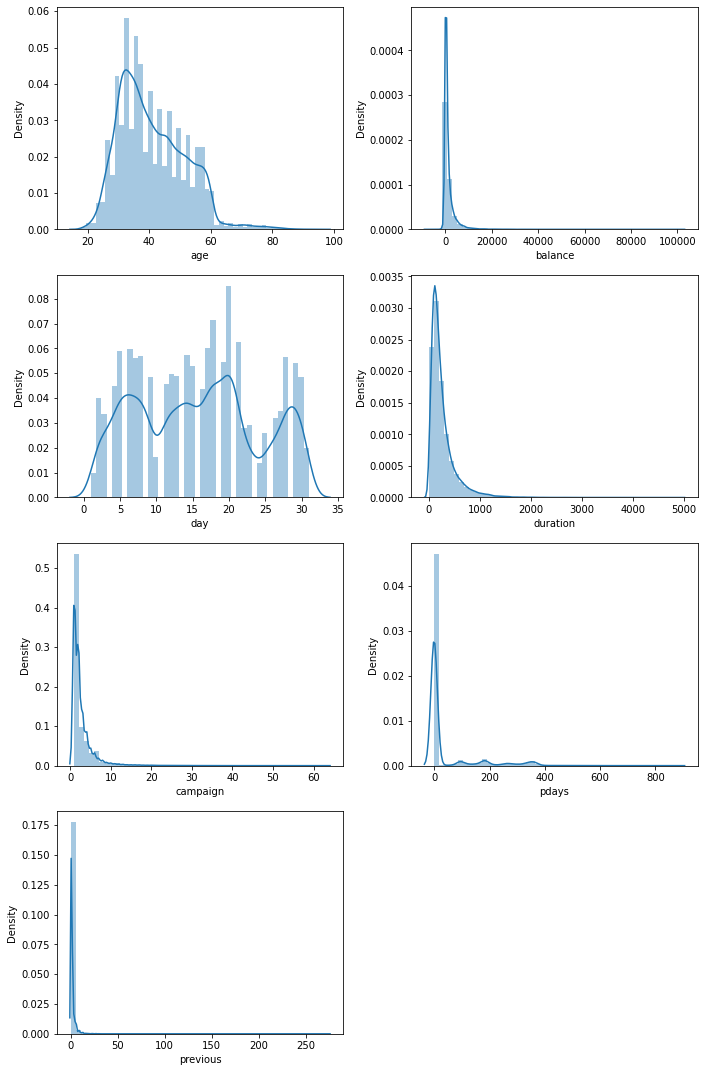

In [15]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10, 15))
axe=axe.flatten()
sns.distplot(Data['age'],ax=axe[0])
sns.distplot(Data['balance'],ax=axe[1])
sns.distplot(Data['day'],ax=axe[2])
sns.distplot(Data['duration'],ax=axe[3])
sns.distplot(Data['campaign'],ax=axe[4])
sns.distplot(Data['pdays'],ax=axe[5])
sns.distplot(Data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

* ___Understanding from distributions:___
1. 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.   
2. 'age' is somewhat normally distributed

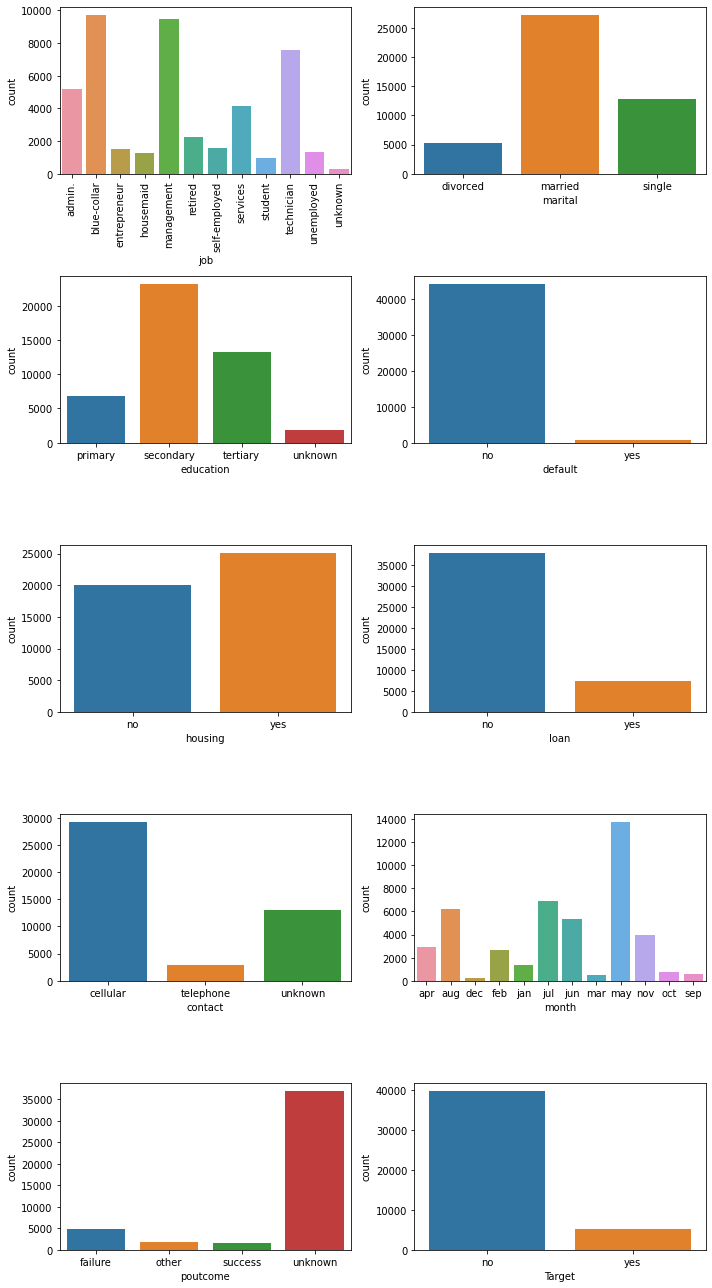

In [16]:
fig,axe=plt.subplots(nrows=5,ncols=2,figsize=(10,18))
axe=axe.flatten()
plot=sns.countplot(x=Data['job'],data=Data,ax=axe[0])
plt.setp(plot.get_xticklabels(),rotation=90)
sns.countplot(x=Data['marital'],data=Data,ax=axe[1])
sns.countplot(x=Data['education'],data=Data,ax=axe[2])
sns.countplot(x=Data['default'],data=Data,ax=axe[3])
sns.countplot(x=Data['housing'],data=Data,ax=axe[4])
sns.countplot(x=Data['loan'],data=Data,ax=axe[5])
sns.countplot(x=Data['contact'],data=Data,ax=axe[6])
sns.countplot(x=Data['month'],data=Data,ax=axe[7])
sns.countplot(x=Data['poutcome'],data=Data,ax=axe[8])
sns.countplot(x=Data['Target'],data=Data,ax=axe[9])
fig.tight_layout()
fig.show()

* ___Understanding from distributions:___
1. More than 90% customers have no default credit.
2. Around 88% customers have not subscribed for term deposit.
3 Most customers have been contacted in may.
4. Most customers have been contacted by cellular network(mobile phone).
5. Number of customers who have housing loan is more than the number of customers who don't have housing
loan.
6. Around 6% customers have credit in default.

In [17]:
Data.skew().to_frame('Skewness measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


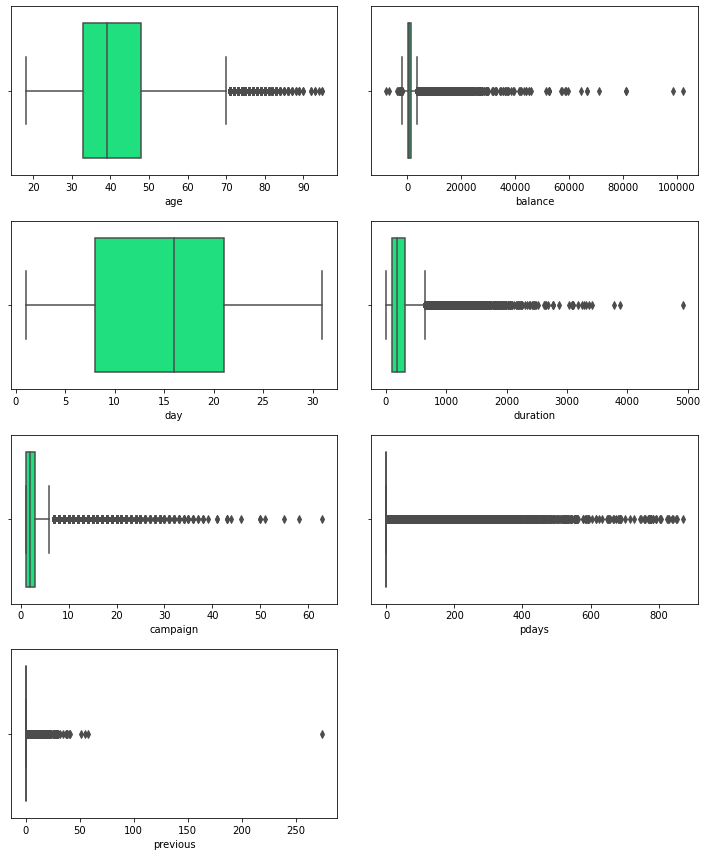

In [18]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,12))
axe=axe.flatten()
sns.boxplot(x='age',data=Data,color='springgreen',ax=axe[0])
sns.boxplot(x='balance',data=Data,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=Data,color='springgreen',ax=axe[2])
sns.boxplot(x='duration',data=Data,color='springgreen',ax=axe[3])
sns.boxplot(x='campaign',data=Data,color='springgreen',ax=axe[4])
sns.boxplot(x='pdays',data=Data,color='springgreen',ax=axe[5])
sns.boxplot(x='previous',data=Data,color='springgreen',ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

* ___Understanding from box plots:___
1. Proves the existence of outliers in 'age','balance','duration','campaign','pdays' and 'previous' columns.
2. Values less than 0 are present in 'balance' column

In [19]:
Data['Target'].value_counts().to_frame('Target column distriution')

,Target column distriution
no,39922
yes,5289


In [20]:
Data_2=Data.copy()
encoder=LabelEncoder()
Data_2['default']=encoder.fit_transform(Data_2['default']).astype(int)
Data_2['marital']=encoder.fit_transform(Data_2['marital']).astype(int)
Data_2['loan']=encoder.fit_transform(Data_2['loan']).astype(int)
Data_2['housing']=encoder.fit_transform(Data_2['housing']).astype(int)
Data_2['Target']=encoder.fit_transform(Data_2['Target']).astype(int)
Data_2['month']=encoder.fit_transform(Data_2['month']).astype(int)
Data_2['poutcome']=encoder.fit_transform(Data_2['poutcome']).astype(int)
Data_2['education']=encoder.fit_transform(Data_2['education']).astype(int)
Data_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


Boxplots after handeling outliers


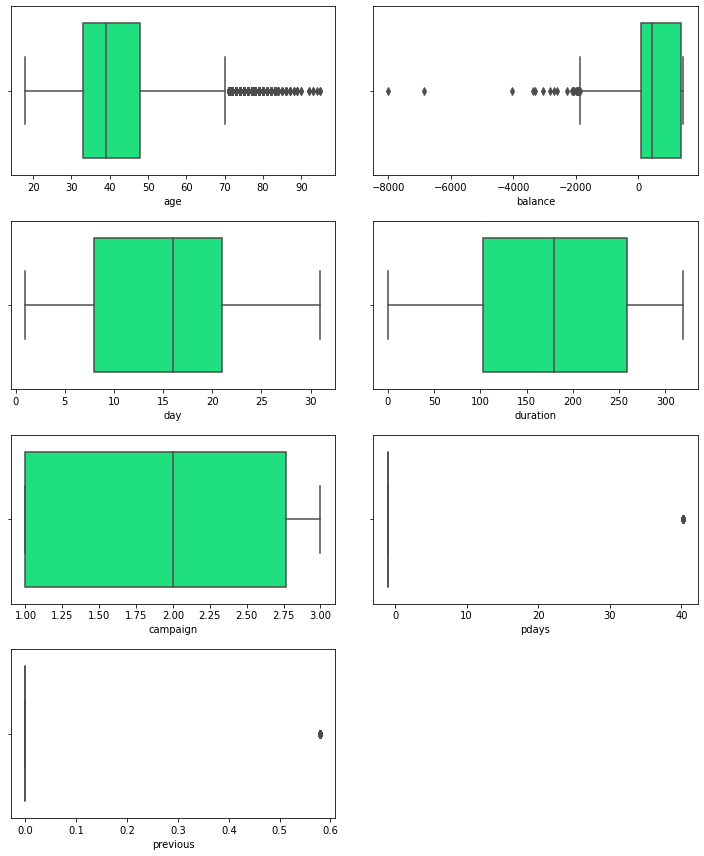

In [21]:
meanbal=float(Data_2['balance'].mean())
Data_2['balance']=np.where(Data_2['balance']>np.percentile(Data_2['balance'],75),meanbal,Data_2['balance'])
meandur=float(Data_2['duration'].mean())
Data_2['duration']=np.where(Data_2['duration']>np.percentile(Data_2['duration'],75),meandur,Data_2['duration'])
meancam=float(Data_2['campaign'].mean())
Data_2['campaign']=np.where(Data_2['campaign']>np.percentile(Data_2['campaign'],75),meancam,Data_2['campaign'])
meanpd=float(Data_2['pdays'].mean())
Data_2['pdays']=np.where(Data_2['pdays']>np.percentile(Data_2['pdays'],75),meanpd,Data_2['pdays'])
meanpr=float(Data_2['previous'].mean())
Data_2['previous']=np.where(Data_2['previous']>np.percentile(Data_2['previous'],75),meanpr,Data_2['previous'])
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,12))
axe=axe.flatten()
sns.boxplot(x='age',data=Data_2,color='springgreen',ax=axe[0])
sns.boxplot(x='balance',data=Data_2,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=Data_2,color='springgreen',ax=axe[2])
sns.boxplot(x='duration',data=Data_2,color='springgreen',ax=axe[3])
sns.boxplot(x='campaign',data=Data_2,color='springgreen',ax=axe[4])
sns.boxplot(x='pdays',data=Data_2,color='springgreen',ax=axe[5])
sns.boxplot(x='previous',data=Data_2,color='springgreen',ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')

* ___Understanding from boxplots after handling outliers:___
1. Outliers in 'age' column are not handled because it is a specific value for each record.
2. After handling the outliers in 'balance' the number of outliers on the lower side is increased.

In [ ]:
#Data_2= pd.get_dummies(df_2,columns=['housing','default','loan','poutcome'])

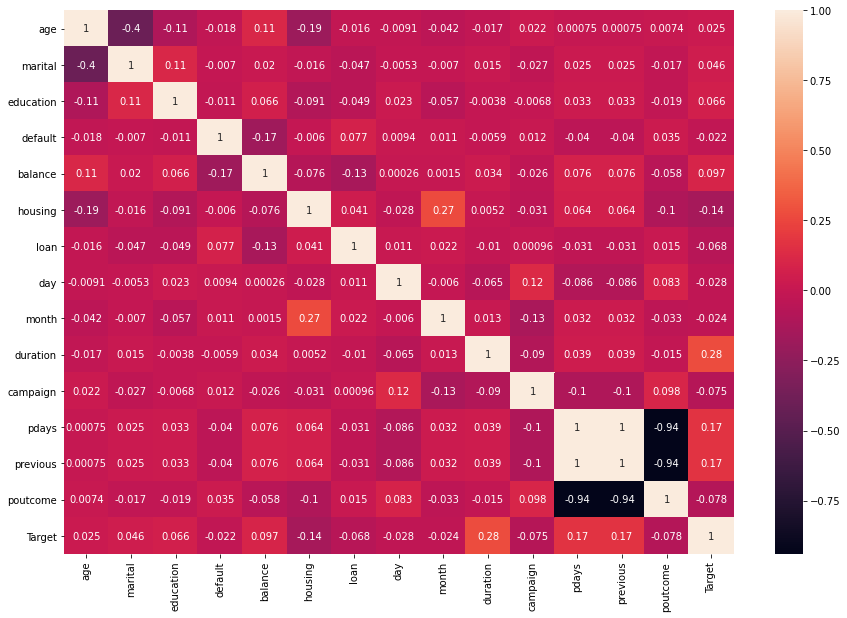

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(Data_2.corr(),annot=True)

* ___Understanding from above corrp plot:___
1. 'pdays' and 'previous' are highly correlated

In [23]:
Data_2=Data_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
Data_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


In [24]:
Data_2.dtypes

age           int64
marital       int64
default       int64
balance     float64
housing       int64
loan          int64
campaign    float64
previous    float64
poutcome      int64
Target        int64
dtype: object

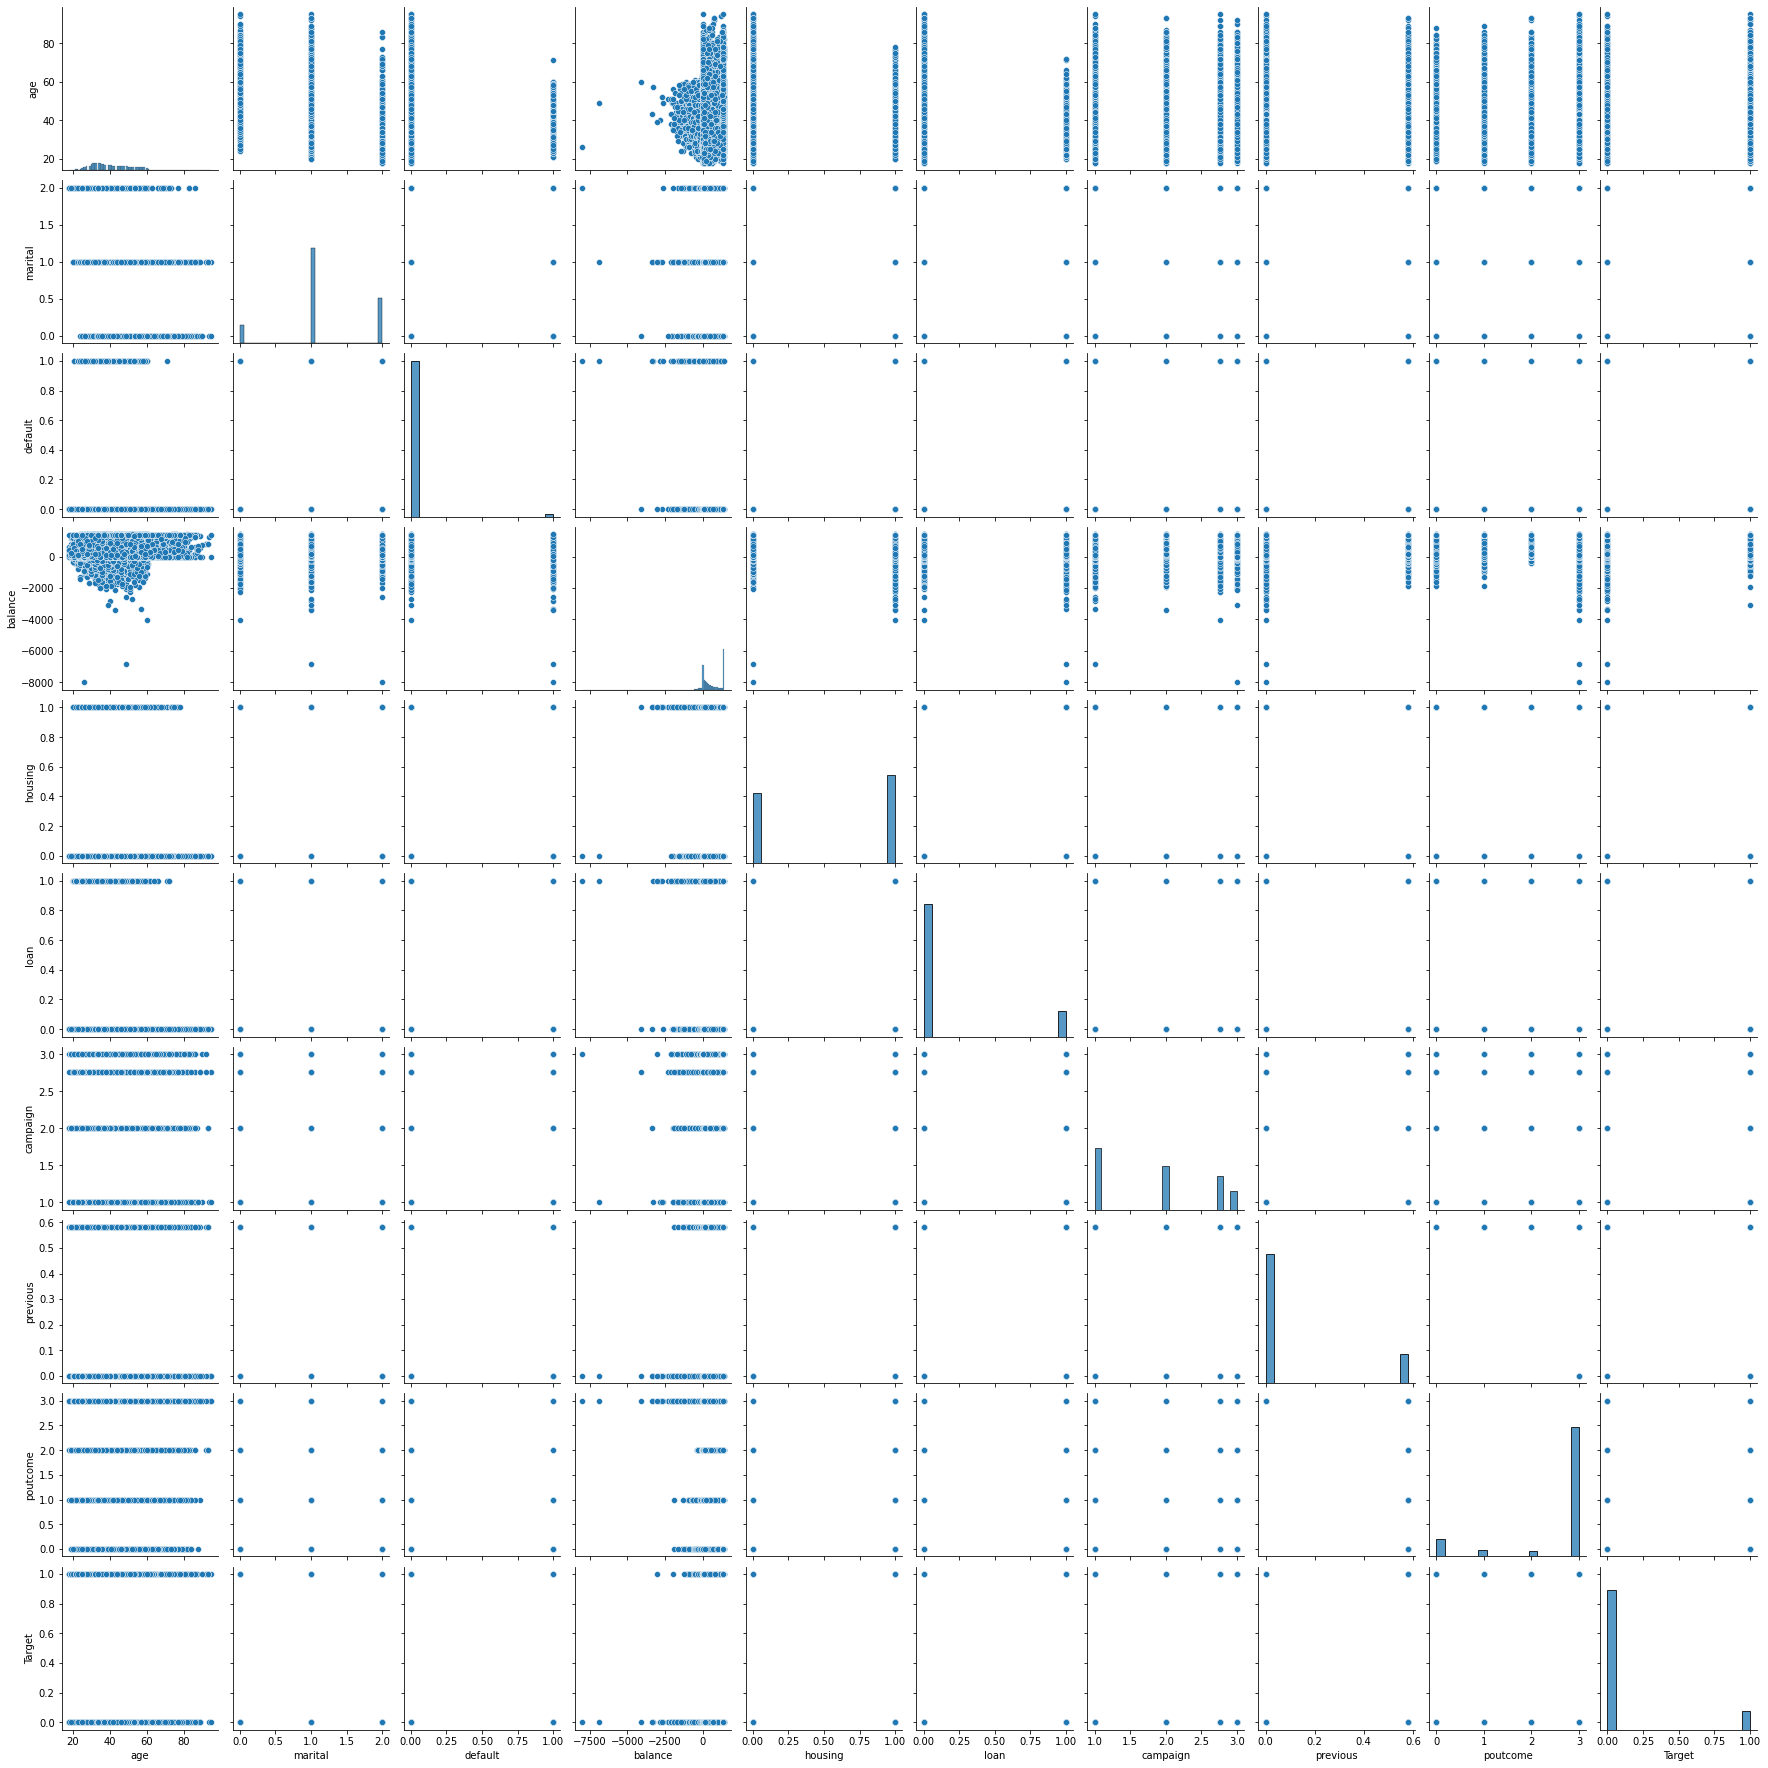

In [25]:
sns.pairplot(Data_2)

In [26]:
X=Data_2.drop('Target',axis=1)
y=Data_2['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [27]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [28]:
logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(X_train_scaled,y_train)
y_pred=logic_r.predict(X_test_scaled)

In [29]:
print('\033[1m''->'*30)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy))
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('->'*30)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11897   116]
 [ 1310   241]]
----------------------------------------
Accuracy of Logistic Regression :0.89
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [30]:
NB=GaussianNB()
NB.fit(X_train_scaled,y_train)
y_predi=NB.predict(X_test_scaled)

In [31]:
print('\033[1m''->'*30)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi))
print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi))
print('->'*30)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of Naive Bayes :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [32]:
# k=3
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train_scaled,y_train)
y_predict = knn.predict(X_test_scaled)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi))
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


optimal k is 13


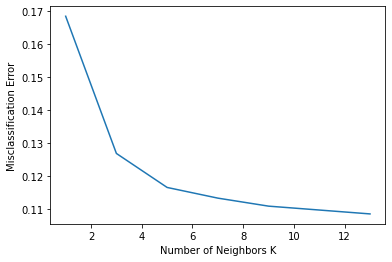

In [33]:
oddList = list(np.arange(1,15))
neighbors = list(filter(lambda x: x % 2 != 0, oddList))
accuracy_list = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_s = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy_s)
MSE=[1 - j for j in accuracy_list]
optimal = neighbors[MSE.index(min(MSE))]
print('optimal k is',optimal)
plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [34]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
predicted_svc = svc.predict(X_test_scaled)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc))
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc)
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11867   146]
 [ 1273   278]]
------------------------------
Accuracy of SVC : 0.8953848422294308
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [35]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
predicted_DT = dTree.predict(X_test)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT))
print('-'*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11020   993]
 [ 1190   361]]
------------------------------
Accuracy of Decision Tree :0.84
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [36]:
xvar=Data_2.drop('Target', axis=1)
feature_cols = xvar.columns
feat_importance = dTree.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.442826
age,0.248702
poutcome,0.095115
campaign,0.086817
marital,0.040698
previous,0.034347
loan,0.025493
housing,0.022714
default,0.003286


In [37]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
predicted_DTR = dTreeR.predict(X_test)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR))
print('-'*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11826   187]
 [ 1237   314]]
------------------------------
Accuracy of Decision Tree with Regularization:0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


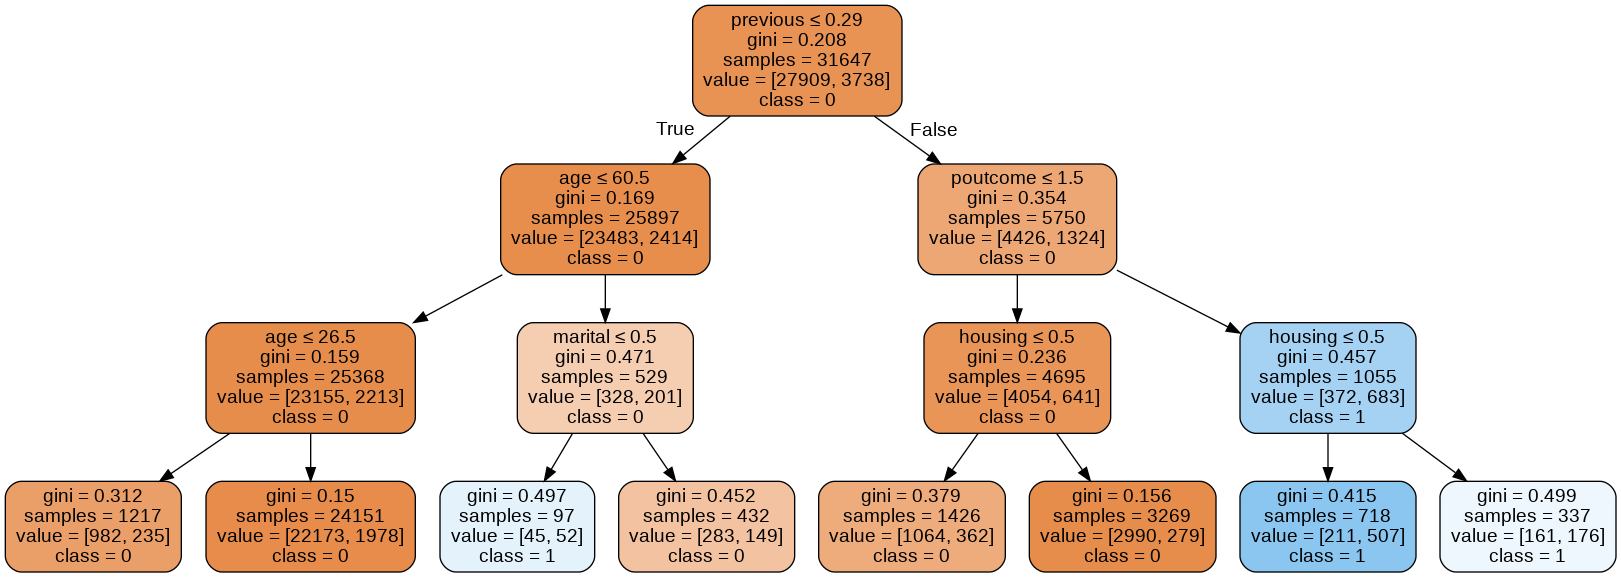

In [38]:
dot_data = StringIO()
export_graphviz(dTreeR, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT.png')
Image(graph.create_png())

In [39]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


In [40]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1)
bagc = bagc.fit(X_train, y_train)
predicted_BAG = bagc.predict(X_test)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG))
print('-'*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11617   396]
 [ 1220   331]]
------------------------------
Accuracy of Decision Tree :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.46      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [41]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA))
print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11884   129]
 [ 1309   242]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [42]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test) #Predict
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD))
print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11889   124]
 [ 1305   246]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [43]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train)
predicted_RAN = randf.predict(X_test)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN))
print('-'*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN ))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11588   425]
 [ 1211   340]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [44]:
#n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5)
randf = randf.fit(X_train, y_train)
predicted_RANN = randf.predict(X_test)
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN))
print('-'*30)
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('Accuracy of KNN :{:.2f}'.format(RANN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RANN))
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11614   399]
 [ 1216   335]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.93     12013
           1       0.46      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [45]:
Scores = [('Naive bayes', NB_accuracy),('KNN', KNN_accuracy),('Logistic Regression', LR_accuracy),('SVC', SVC_accuracy ),('Decision Tree',DT_accuracy),('Decision Tree with Regularization',DTR_accuracy),('Bagging',BAG_accuracy),('Adaptive Boosting',ADA_accuracy),('Gradient Boosting',GRAD_accuracy),('Random Forest N=100',RAN_accuracy),('Random Forest N=500',RANN_accuracy)]
Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])
print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
10,Random Forest N=500,0.880935
6,Bagging,0.880861
9,Random Forest N=100,0.879387
1,KNN,0.873120
4,Decision Tree,0.839059


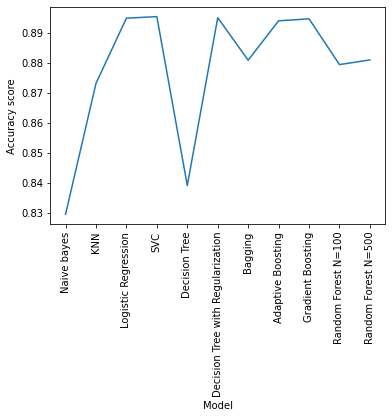

In [46]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True,dashes=False)
plt.xticks(rotation=90)
plt.show()

Benchmark with Duration column and Outliers not handled:


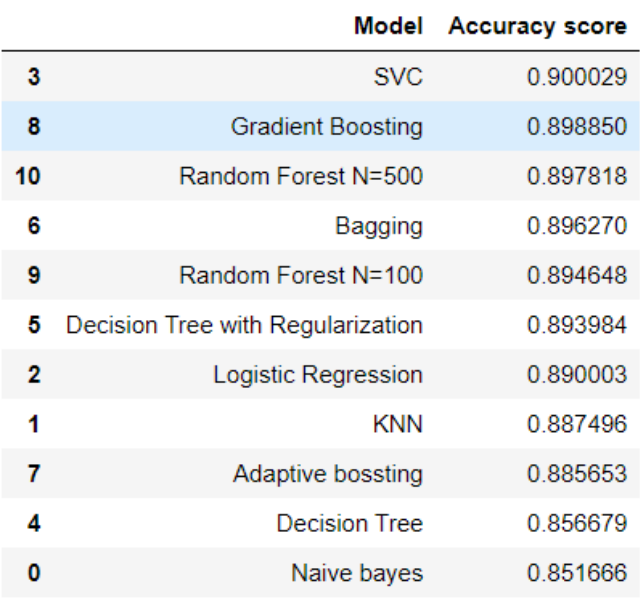

In [47]:
print('\033[1m''Benchmark with Duration column and Outliers not handled:')
Image(filename='/content/drive/MyDrive/imgBenchmark.png',width=400,height=500)

Benchmark with Duration column and Outliers handled with Mean replacement:


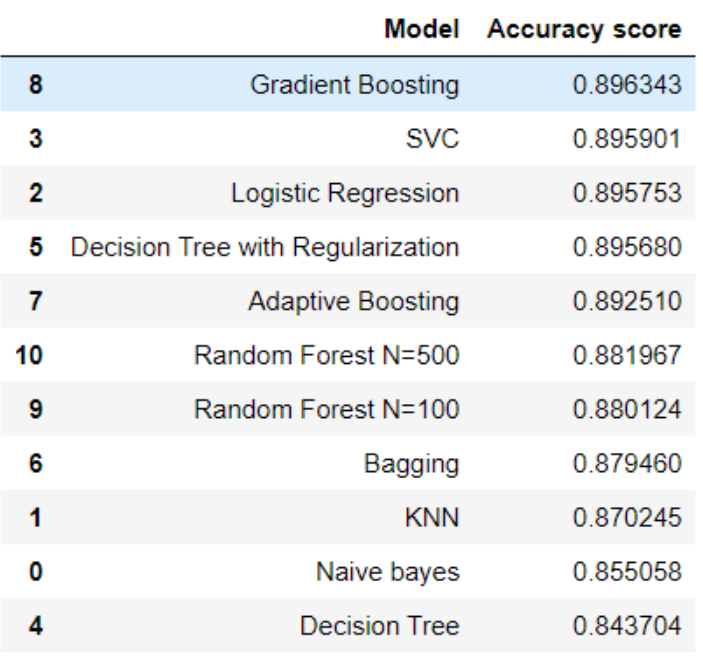

In [48]:
print('\033[1m''Benchmark with Duration column and Outliers handled with Mean replacement:')
Image(filename='/content/drive/MyDrive/imgBenchmarkWOutliers.png',width=400,height=500)

Scores with Outliers replaced with median:


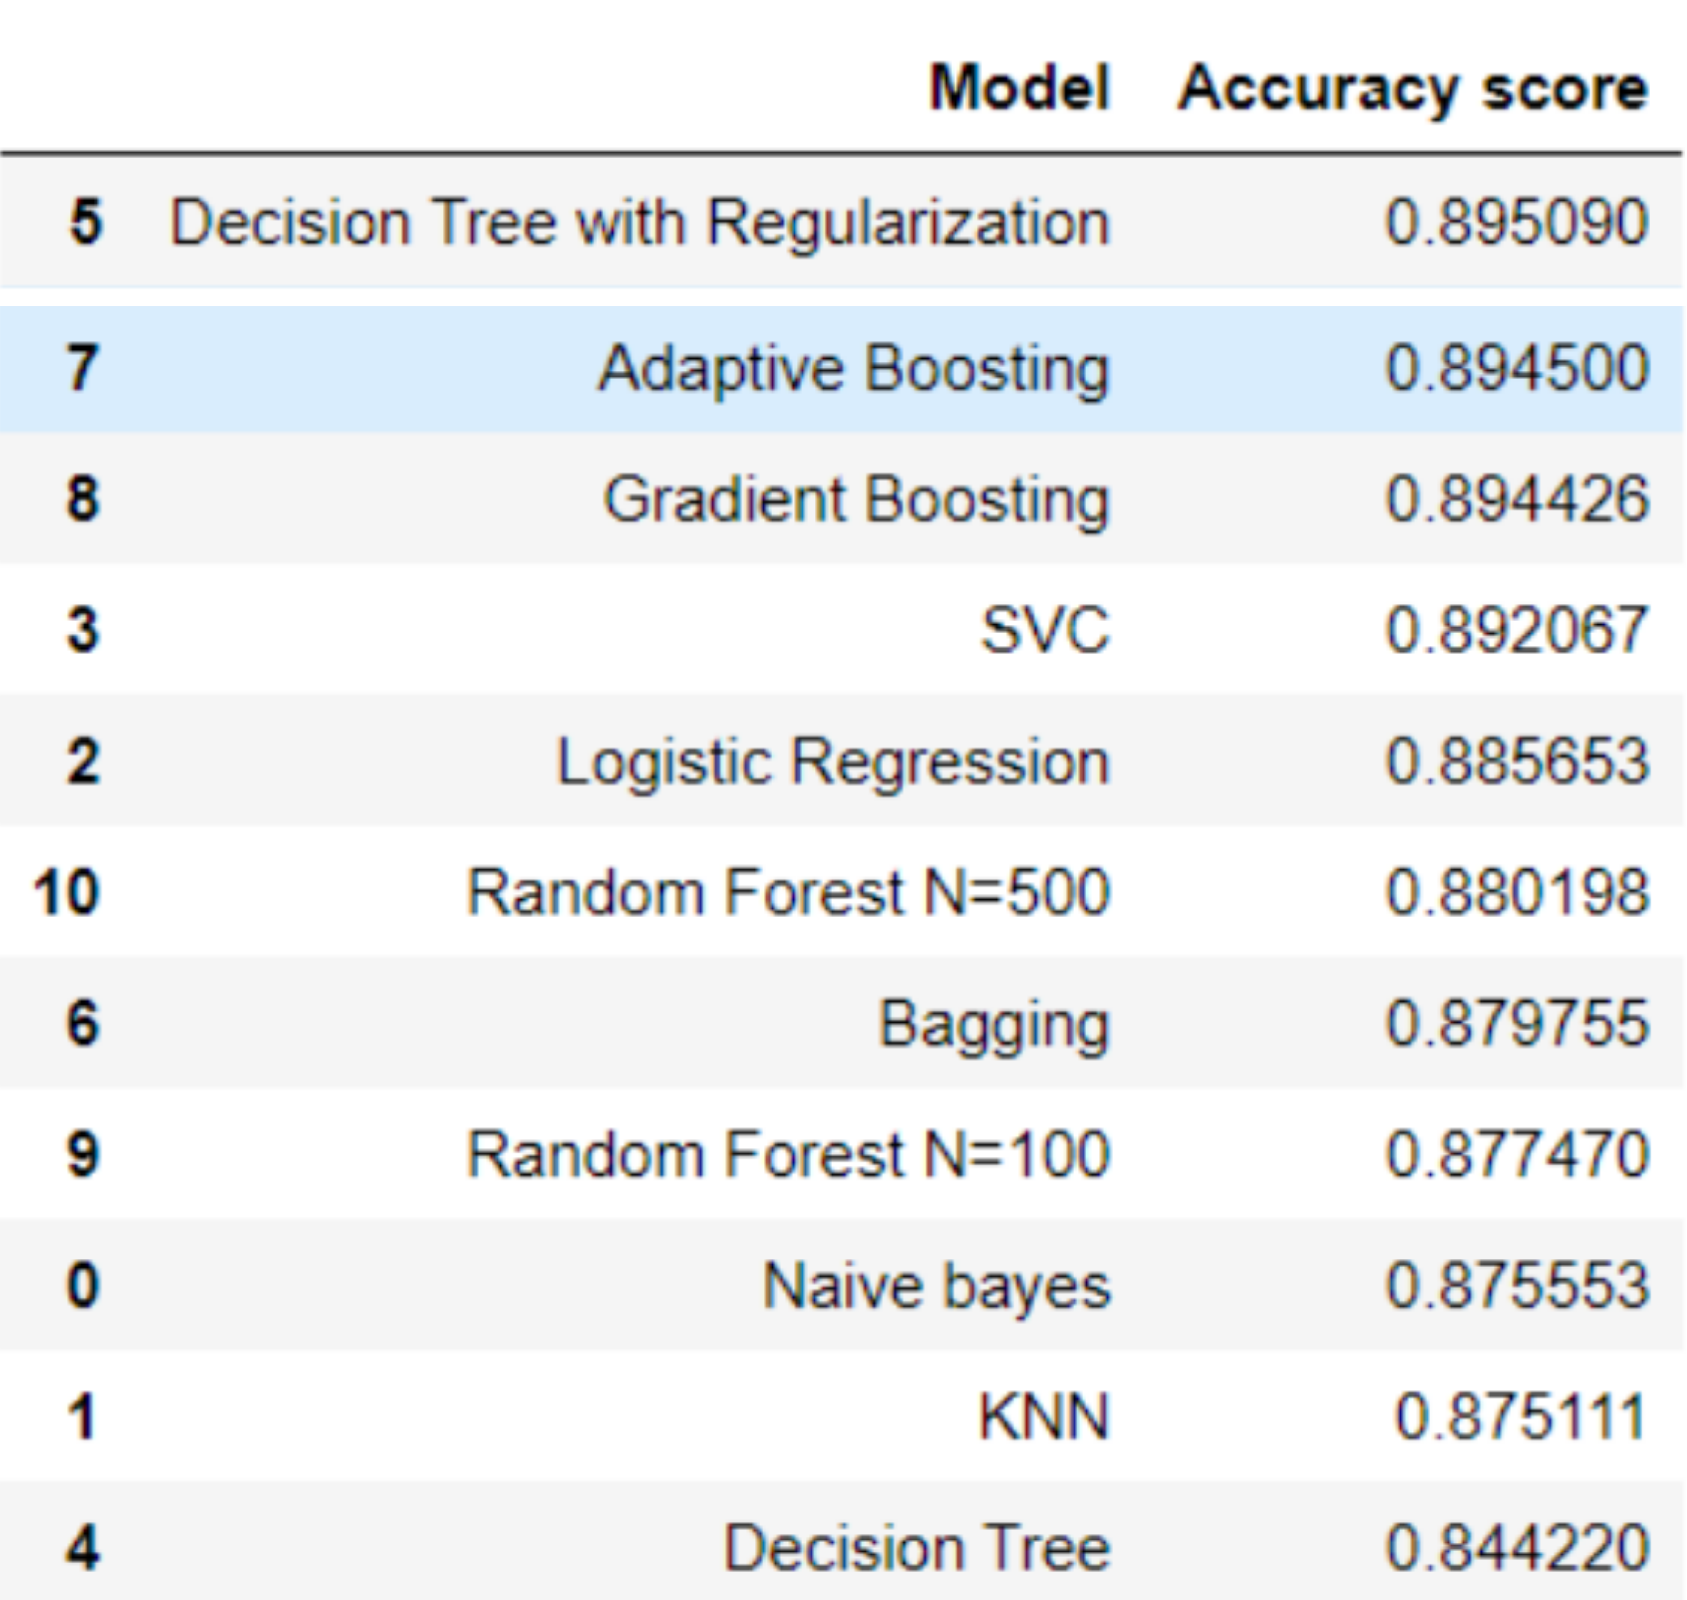

In [49]:
print('\033[1m''Scores with Outliers replaced with median:')
Image(filename='/content/drive/MyDrive/imgOutliersMed.png',width=400,height=500)

Scores without Outliers handeling:


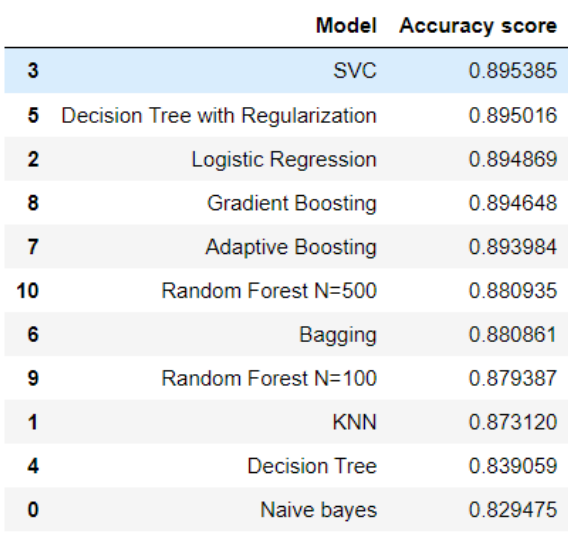

In [50]:
print('\033[1m''Scores without Outliers handeling:')
Image(filename='/content/drive/MyDrive/imgWithOutliers.png',width=400,height=500)

* ___Comments on dataset:___   
 
 1.The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be
 seen in the confusion matrix of all models.
2. The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can
be seen in the confusion matrix of all models.
3. Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and
class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify
class 1.
4. This situation could have been avoided if the datset was balanced.
Along with imbalance, the dataset contained large number of unknown string values in
'job','education','contact' and 'poutcome' columns.

 
* ___Comments on Models:___. 
1. When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate. 
2.SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
3. After removing the 'duration' column, The highest model score dropped by 0.5%.
4. The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores,
getting rid of outliers by mean/median replacement did not affect the scores.
5.In Decision Trees, Gradient boosting method always performed better for this dataset.
6.While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

* ___Miscellaneous Comments:___
  
 
1. After trying get_dummies the score did not show significant difference as well as I have skipped the
get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.
 
2. If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number
of rows then this project would have taken a lot of time to execute.
 
3. Outlier handeling did not make any significant difference in the accuracy scores of models.
 
4. I have tried to keep minimum time complexity of this project.